In [18]:
%matplotlib inline
import numpy as np
import pylab as py
import matplotlib.pyplot as plt

In [88]:
def model(t,C,beta):
    x,y =  C
    dxdt  =  y
    dydt = 0
    if (dxdt > 0):
        dydt  = -x  - beta 
    elif(dxdt < 0):
        dydt  =  -x  + beta
    elif(dxdt == 0):
        dydt  =  -x - beta * min(np.abs(x),beta)
    return np.array([dxdt,dydt])


def RungeKutta4(func,M,t,H,beta):
    arr = np.zeros((len(t),len(M)))
    arr[0] = M
    for n in range(0,len(t)-1):
        k1 = H *func(t[n],arr[n],beta)
        k2 =  H * func(t[n] + (H/2),arr[n] + (H * (k1/2)),beta)
        k3 = func(t[n] + (H/2),arr[n] + (H * (k2/2)),beta)
        k4 =  func(t[n]+ H,arr[n] + (H * k3),beta)
        arr[n+1] =  arr[n] + (1/6)* H * ( k1 + 2*k2 + 2*k3 + k4)
    return arr

## Question 5 

In [83]:
time =  np.linspace(-10,10,3000)
M  =[1,-1]
H =  time[1] - time[0]
# model(t,C)
beta = [0.1,0.2,0.4,0.8]

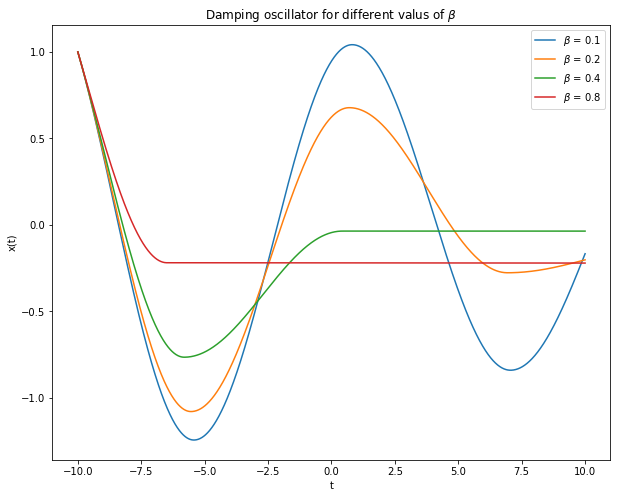

In [89]:
plt.figure(figsize=(10,8))
for b in beta:
        arr = RungeKutta4(model,M,time,H,b)
        x =  arr[:,0]
        y = arr[:,1]
        plt.plot(time,x,label=rf"$\beta$ = {b}")

plt.xlabel('t',)
plt.ylabel('x(t)')
plt.title(rf"Damping oscillator for different valus of $\beta$")
plt.legend()
plt.show()

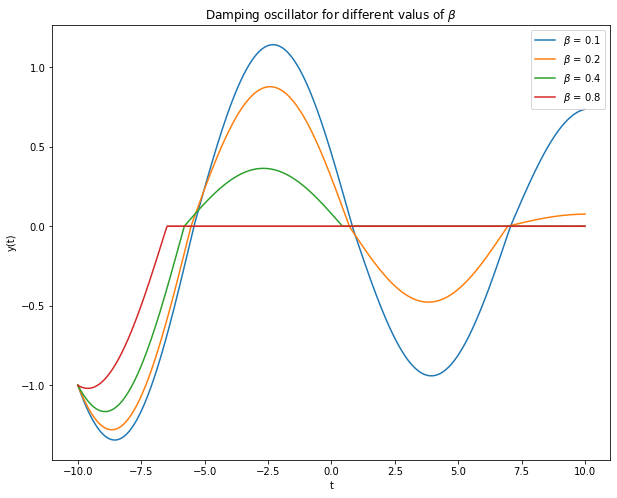

In [90]:
plt.figure(figsize=(10,8))
for b in beta:
        arr = RungeKutta4(model,M,time,H,b)
        x =  arr[:,0]
        y = arr[:,1]
        plt.plot(time,y,label=rf"$\beta$ = {b}")

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title(rf"Damping oscillator for different valus of $\beta$")
plt.legend()
plt.show()

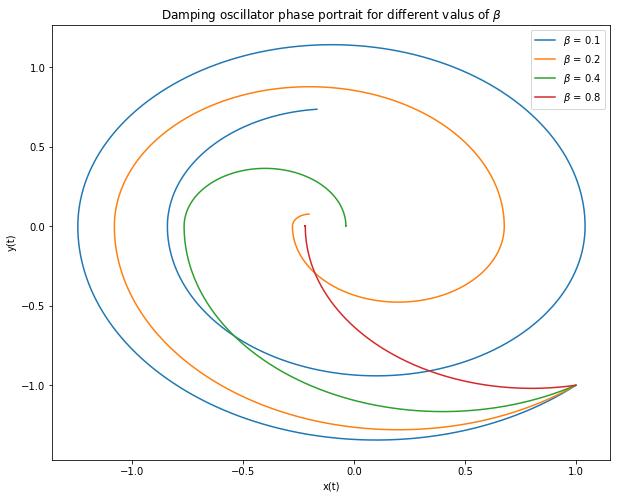

In [91]:
plt.figure(figsize=(10,8))
for b in beta:
        arr = RungeKutta4(model,M,time,H,b)
        x =  arr[:,0]
        y = arr[:,1]
        plt.plot(x,y,label=rf"$\beta$ = {b}")

plt.xlabel('x(t)')
plt.ylabel('y(t)')
plt.title(rf"Damping oscillator phase portrait for different valus of $\beta$")
plt.legend()
plt.show()